# Simple Linear Regression assignment 
# 1. Delivery Time

Problem:
Delivery_time -> Predict delivery time using sorting time 


First we'll import all the required libaries, which includes pandas, numpy, matplotlib, and seaborn. Then we'll set %matplotlib inline and we'll import rest of the sklearn stuff later

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we will fetch the data from the csv file and check information and description of the data 

In [2]:
dtime = pd.read_csv('delivery_time.csv')

In [3]:
dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
dtime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Exploratory Data Analysis
Let's explore the data!

In [6]:
sns.set_style('whitegrid')

We will use seaborn to create a jointplot to compare the sorting time and delivery time

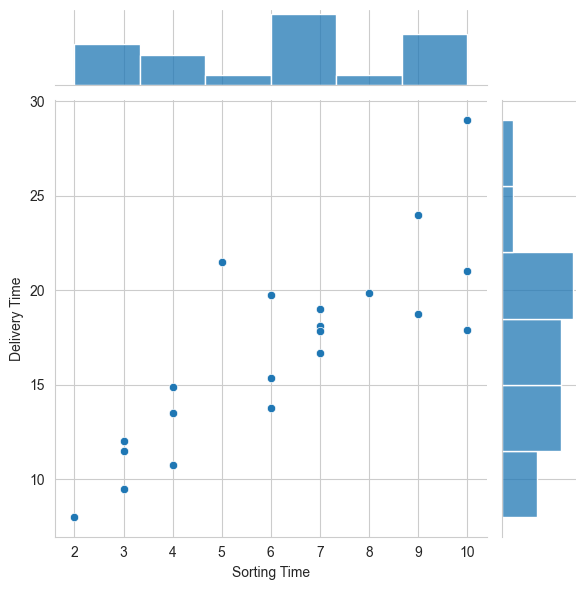

In [7]:
sns.jointplot(x = 'Sorting Time', y = 'Delivery Time', data = dtime)

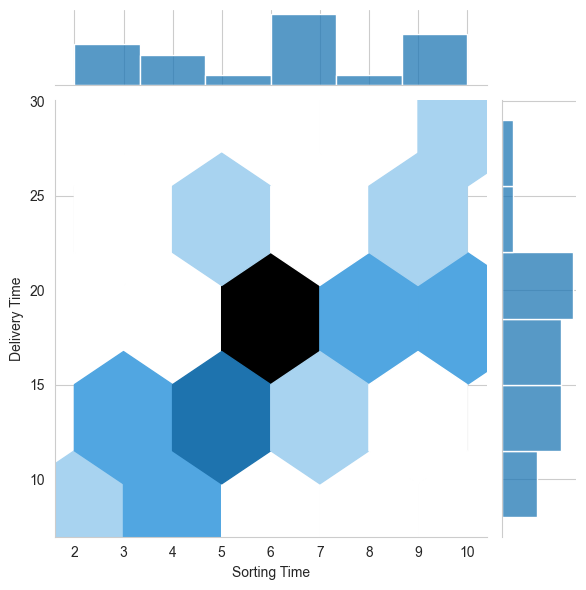

In [8]:
sns.jointplot(x = 'Sorting Time', y = 'Delivery Time', data = dtime, kind = 'hex')

It seems to have a linear relation between them. As the value of x, which is sorting time is increasing, the value of y, that is, delivery time is also increasing.
Also, from the displot and 2D hex plotting we can see that, delivery time is more frequent around the middle of the data.

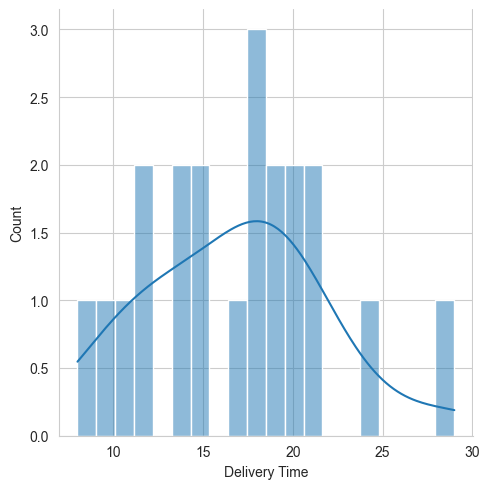

In [9]:
sns.displot(dtime['Delivery Time'], bins = 20, kde = True)

<Axes: >

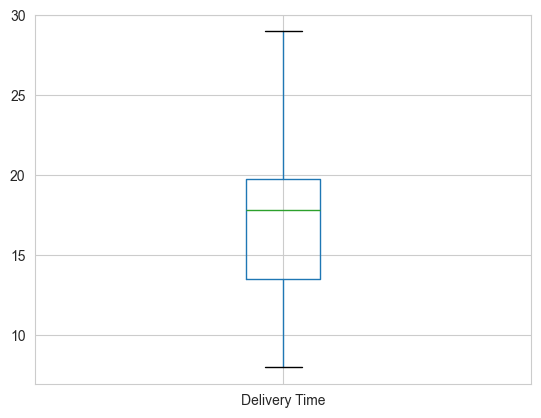

In [10]:
dtime.boxplot(column = ['Delivery Time'])

There is no outlier present in the data. 


Now, we will try to look more closely to better understand the correlation between the two columns, using pairplot and heatmap.

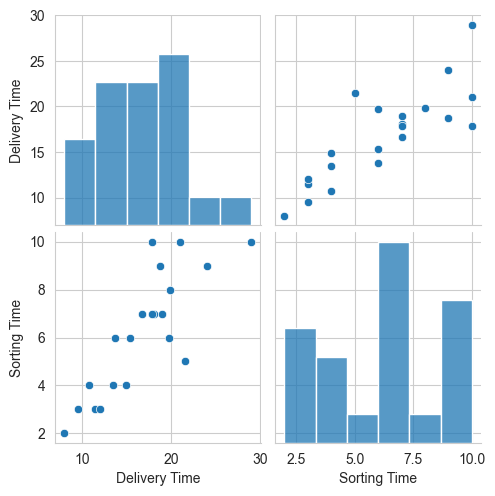

In [11]:
sns.pairplot(dtime)

We can see here that sorting time and delivery time are very correlated with each other, so that they are forming a linear relation between them.

<Axes: >

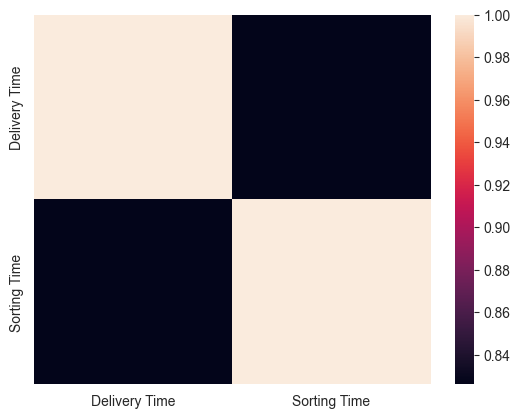

In [12]:
sns.heatmap(dtime.corr(numeric_only = True))

Here, from the heatmap we can see that the two columns are around 84% correlated, which is a good criteria for forming predictive model based on them.

In [13]:
dtime.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


So, the actual correlation value is 0.826 (approx)

Now we'll create a linear model plot using seaborn's lmplot of sorting time vs delivery time

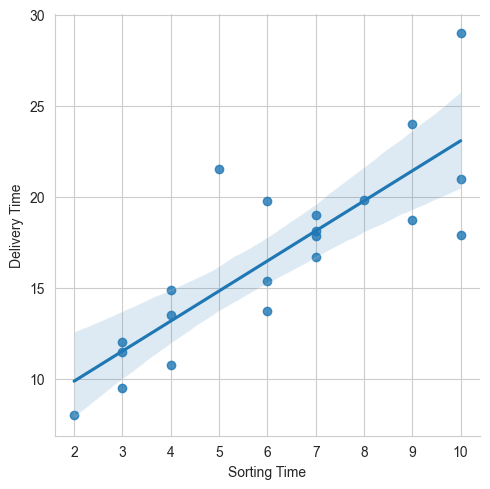

In [14]:
sns.lmplot(x = 'Sorting Time', y = 'Delivery Time', data = dtime)

<Axes: >

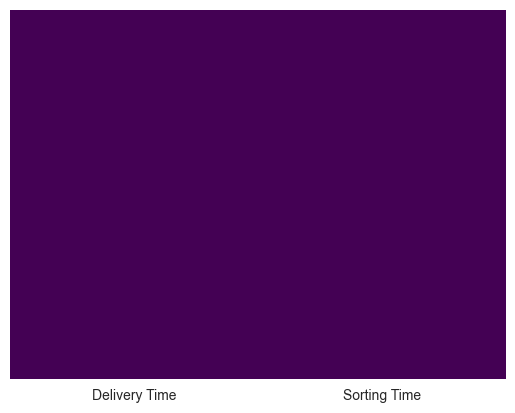

In [15]:
sns.heatmap(dtime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
dtime.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

There is no missing value in the data, so we are ready to go!

# Now we'll create our model

Before that we would set a variable X equal to the sorting time and y equal to the delivery time. 
So, we'd have y = f(X) type of formation.

In [17]:
X = pd.DataFrame(dtime['Sorting Time'])
y = dtime['Delivery Time']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sorting Time  21 non-null     int64
dtypes: int64(1)
memory usage: 300.0 bytes


In [19]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21 entries, 0 to 20
Series name: Delivery Time
Non-Null Count  Dtype  
--------------  -----  
21 non-null     float64
dtypes: float64(1)
memory usage: 300.0 bytes


# Training and Testing data
Now, we'll take our data and split it into two set, training and testing data.

We would use model_selection.train_test_split from sklearn to split the data into training and testing data. By default training set would have 75% data. 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# Training the Model
Now it is time to train our model on our training data!
So, we'd import LinearRegression from sklearn.linear_model

In [21]:
from sklearn.linear_model import LinearRegression

Now, we would create a LinearRegression model named lm

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
print('Coefficient: \n', lm.coef_)

Coefficient: 
 [1.4028125]


# Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [25]:
predictions = lm.predict(X_test)

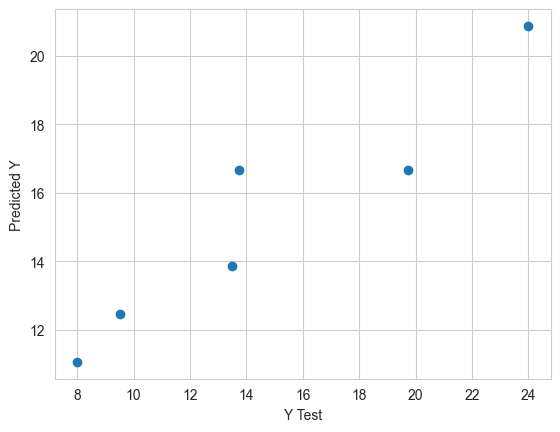

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Evaluation of the model

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.585083333333335
MSE: 7.6716234934895935
RMSE: 2.769769574078247


# Residuals

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13320\3176952174.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins = 4)


<Axes: xlabel='Delivery Time', ylabel='Density'>

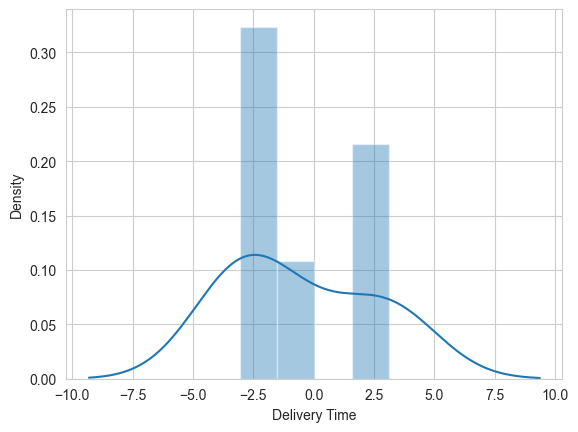

In [28]:
sns.distplot((y_test-predictions), bins = 4)

# Conclusion

In [29]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Sorting Time,1.402812


Because there is only 1 feature, so here 1 unit increase in sorting time is associated with 1.4028 unit increase in delivery time

In [30]:
lm.score(X_test, y_test)  

0.7528604512164426

Also, the model is 75% accurate

# Alternate model

In [31]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Mon, 15 Jan 2024   Prob (F-statistic):                    6.12e-15
Time:                        07:19:53   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
lm.predict([[8]])

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.47775])

In [34]:
model.predict([[8]])

array([20.52197002])

# transformational  model: log

In [59]:
X.head()

,Sorting Time
0,10
1,4
2,6
3,9
4,10


In [60]:
X_log = np.log(X)
X_log.head()

,Sorting Time
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585


In [61]:
y_log = np.log(y)
y_log.head()

0    3.044522
1    2.602690
2    2.983153
3    3.178054
4    3.367296
Name: Delivery Time, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, random_state=101)

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
pred = model.predict(X_test)

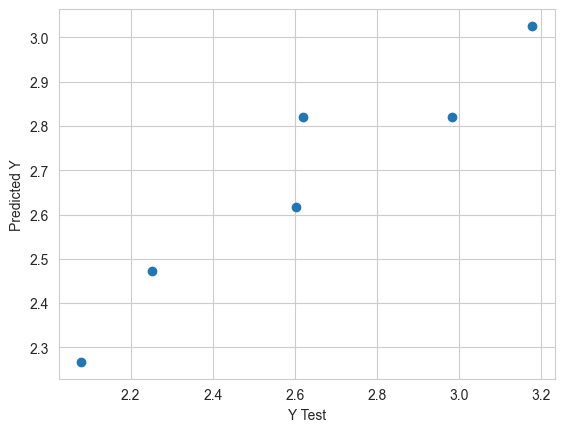

In [66]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1559922289577694
MSE: 0.028880650197073365
RMSE: 0.16994307928560481


In [68]:
model.score(X_test, y_test)

0.8012232421275839

Therefore, performance improved for log transformation. Error is also very low.

# transformational  Model: Square

In [69]:
X_sq = np.square(X)
X_sq.head()

,Sorting Time
0,100
1,16
2,36
3,81
4,100


In [70]:
y_sq = np.square(y)
y.head()

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery Time, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_sq, y_sq, random_state=101)

In [72]:
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)

LinearRegression()

In [74]:
pred = model.predict(X_test)

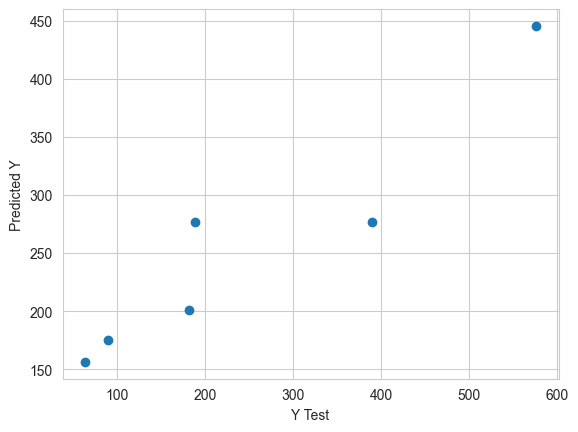

In [75]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 87.98911364441476
MSE: 8945.620715439647
RMSE: 94.58129157206328


In [77]:
model.score(X_test, y_test)

0.7237603690716716

Performace decreased as compared to log model.

# transformational  model: Sqrt

In [78]:
X_sqrt = np.sqrt(X)
X_sq.head()

,Sorting Time
0,100
1,16
2,36
3,81
4,100


In [79]:
y_sqrt = np.sqrt(y)
y_sqrt.head()

0    4.582576
1    3.674235
2    4.444097
3    4.898979
4    5.385165
Name: Delivery Time, dtype: float64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_sqrt, y_sqrt, random_state=101)

In [81]:
model = LinearRegression()

In [82]:
model.fit(X_train, y_train)

LinearRegression()

In [83]:
pred = model.predict(X_test)

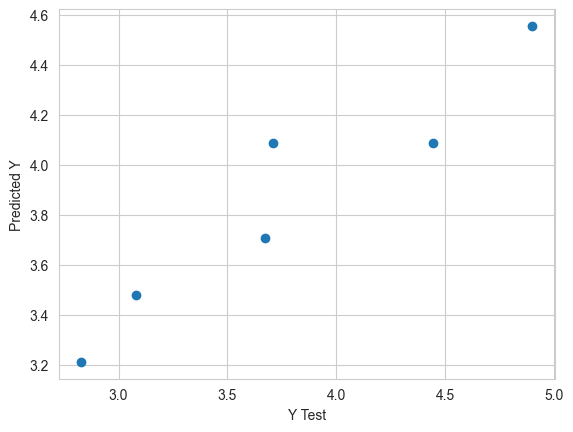

In [84]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.31609408157592456
MSE: 0.11612684151055473
RMSE: 0.3407738861922297


In [86]:
model.score(X_test, y_test)

0.7753528848657517

So in transformational model of square root has also low error and accuracy is about 77%.